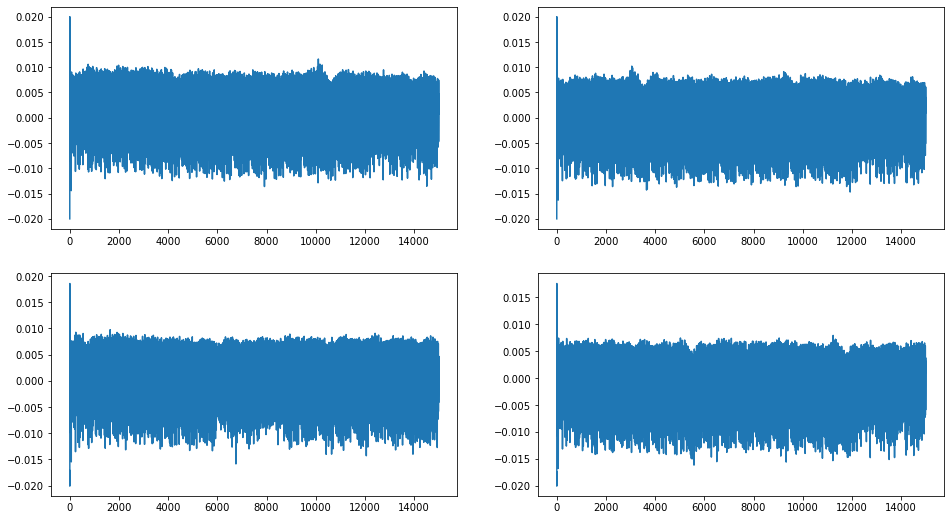

In [17]:
'''
AES_Sbox：用來產生labels，256個值(16*16)
hw_list：漢明重量清單，256個值(16*16)
'''


import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# The AES SBox that we will use to generate our labels
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])
# The Hamming weight list of each byte value
hw_list = np.array([
            0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7,
            3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7, 4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6, 7, 7, 8
            ])


# Load the joined trace file
data = np.load('aes_power_randkey.npz', allow_pickle=True)
t = data['traces']  #二維矩陣，裡面包含50000個矩陣，每t[n]裡有15000個數 <class 'numpy.float64'>
k = data['keys']   #二維矩陣，裡面包含50000個矩陣，每k[n]裡有16個數 <class 'numpy.uint8'>
p = data['plaintexts'] #二維矩陣，裡面包含50000個矩陣，每p[n]裡有16個數 <class 'numpy.uint8'>


plt.figure(figsize=(16, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(t[i+100])    #選取trace裡第100~103筆資料，用15000個點做圖

plt.show()

In [2]:
hd_list = hw_list[AES_Sbox[k^p]]

In [3]:
SNRplot = []
for x in range(0,16):
    listHDGP = [[] for i in range(0,9)]       #漢明距離有0~9
    for i in range(len(hd_list[x])):          #plaintext有16個，所以加密16次(k也有16個)，也就是老師說的16個bytes
        for j in range(len(hd_list)):         #50000
                if hd_list[j][x] == i:
                    listHDGP[i].append(t[j])  

    meanlist = []
    varlist = []
    for i in range(0,9):
        meanlist.append(np.mean(listHDGP[i],axis = 0))
        varlist.append(np.var(listHDGP[i],axis = 0))

    son2 = np.var(meanlist,axis = 0)  
    mother2 = np.mean(varlist,axis = 0)

    SNR2 = np.array(son2/mother2)
    SNRplot.append(SNR2)

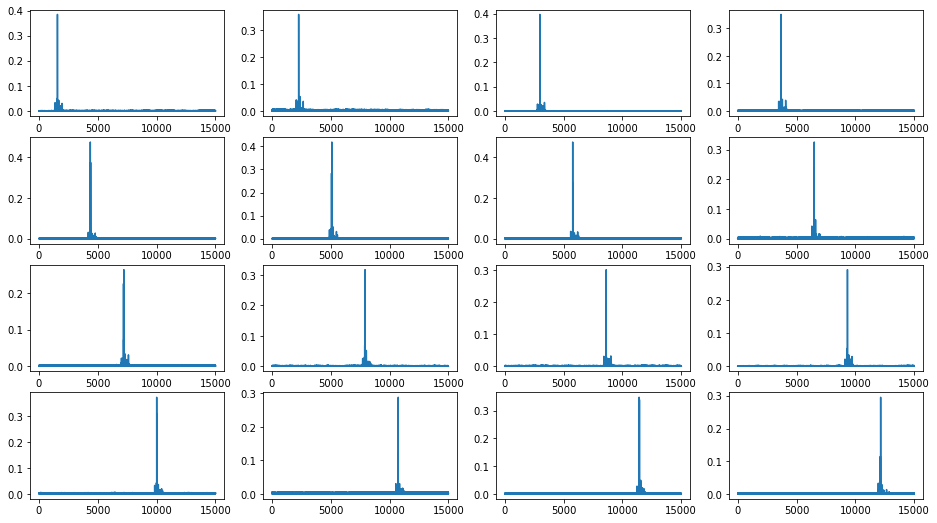

In [4]:
plt.figure(figsize=(16,9))
for i in range(16):
    plt.subplot(4,4 , i+1)
    plt.plot(SNRplot[i])  
plt.savefig('16bytes.png')
plt.show()     #找出16個plaintext跟16個K加密時真正的加密訊號

In [12]:
# print(meanlist.shape)
print(varlist[0].shape)

(15000,)


In [14]:
covlist = []
for i in range(0,9):
    covlist.append(np.cov(listHDGP[i]))

In [16]:
print(covlist[0].shape)

(206, 206)


In [28]:
SNRsort = np.argsort(SNR2)    #最小的數字開始排序，直到最大，輸出的是index
SNRmax = np.argmax(SNR2)

In [30]:
print(SNRsort)
print(SNRmax)

[12598 11469 11955 ... 12151 12150 12149]
12149


In [27]:
test = np.array([80,20,15])
testsort = np.argsort(test)
print(testsort)

[2 1 0]


In [32]:
POI = SNRsort[:10]
print(POI)

[12598 11469 11955 12606 12645 12700  8208 10881 12782 12755]
